In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

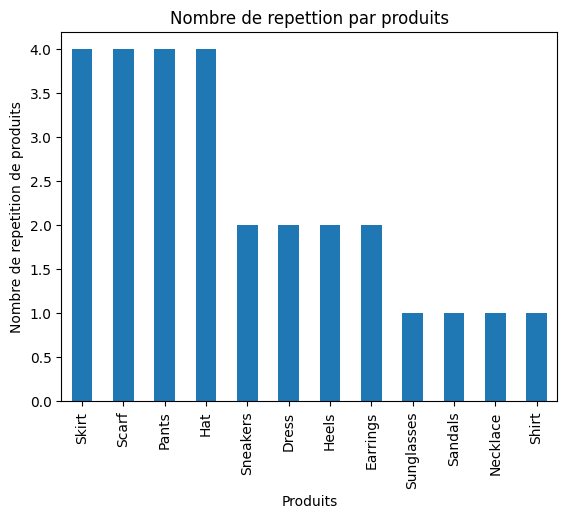

In [43]:
# Tout d'abord, nous devons convertir l'ensemble de données en un DataFrame de Pandas.
df = pd.DataFrame(dataset)

# Maintenant, nous pouvons utiliser la fonction value_counts() pour compter la fréquence de chaque élément dans les transactions
item_counts = df.stack().value_counts()


item_counts.plot(kind='bar')
plt.xlabel('Produits')
plt.ylabel('Nombre de repetition de produits')
plt.title('Nombre de repettion par produits')
plt.show()

In [44]:
# on fait l'encodage avec et on refait un autre dataset 
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder() 
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
new_df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
new_df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


Support 

In [45]:
# size and color:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(new_df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


#

# confiance

In [46]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


# Ascenseur

In [47]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [48]:
data_frame= pd.read_csv("Market_Basket_Optimisation.csv",header=None)
data_frame.shape

(7501, 20)

In [49]:
market_items = (data_frame[0].unique())
print(market_items)
print('', len(market_items))

['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

In [50]:
encoded_values = []
#La liste encoded_values est créée en itérant sur les lignes d'un DataFrame
# appelé data_frame à l'aide de la méthode iterrows. 
# Pour chaque ligne, le code crée un dictionnaire vide appelé market_basket_labels, 
# \puis le remplit de clés et de valeurs basées sur les éléments de la ligne.

for i, j in data_frame.iterrows():
    market_basket_labels = dict() # on declare un dictionnaire vide
    
    
    uncommons = list(set(market_items) - set(j)) # liste d'éléments qui ne sont pas présents dans la ligne, 
    commons = list(set(market_items).intersection(j)) #liste d'éléments qui sont présents dans la ligne. et defeni aussi la valeur d
    #dictionnaire market_basket_labels à 1.
    for uc in uncommons:
        market_basket_labels[uc] = 0
    for common in commons:
        market_basket_labels[common] = 1
    encoded_values.append(market_basket_labels)

market_basket_optimisation_encoded = pd.DataFrame(encoded_values)

In [51]:
market_basket_optimisation_encoded.head()

,black tea,eggs,fromage blanc,tomatoes,salt,babies food,cider,whole wheat pasta,herb & pepper,whole wheat rice,...,mineral water,salmon,salad,tomato juice,spinach,frozen smoothie,cottage cheese,low fat yogurt,shrimp,almonds
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [52]:
#Ce code crée une liste du nombre de fois où chaque élément apparaît dans le DataFrame 

item_list = market_basket_optimisation_encoded.columns
item_count = list()
for item in item_list:
        item_count.append(len(market_basket_optimisation_encoded[market_basket_optimisation_encoded[item]==1]))
    
print(item_count)

[107, 1348, 102, 513, 69, 34, 79, 221, 371, 439, 118, 715, 131, 124, 99, 713, 204, 33, 351, 139, 211, 205, 603, 243, 46, 608, 65, 595, 90, 33, 37, 972, 47, 39, 141, 32, 199, 181, 31, 49, 44, 78, 737, 58, 45, 149, 143, 1306, 82, 379, 1229, 1282, 117, 52, 68, 383, 160, 199, 106, 33, 46, 115, 34, 203, 226, 65, 31, 193, 169, 253, 173, 61, 47, 36, 14, 90, 69, 86, 157, 167, 654, 7, 73, 323, 393, 81, 65, 63, 469, 58, 36, 450, 42, 101, 35, 86, 70, 494, 68, 67, 200, 193, 250, 356, 991, 1788, 319, 37, 228, 53, 475, 239, 574, 536, 153]


In [53]:
import plotly.express as px
item_count_df = pd.DataFrame()
item_count_df['item'] = item_list
item_count_df['count'] = item_count



In [54]:
px.bar(item_count_df.sort_values(by = 'count', ascending = False).iloc[0:10,], x = 'item', y = 'count')

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Support

In [55]:
market_basket_frequent_items = apriori(market_basket_optimisation_encoded, min_support=0.02, use_colnames = True, verbose = 1, max_len=2)
market_basket_frequent_items

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



Processing 2756 combinations | Sampling itemset size 2


,support,itemsets
0,0.179709,(eggs)
1,0.068391,(tomatoes)
2,0.029463,(whole wheat pasta)
3,0.049460,(herb & pepper)
4,0.058526,(whole wheat rice)
...,...,...
98,0.027596,"(olive oil, mineral water)"
99,0.031063,"(green tea, mineral water)"
100,0.020264,"(frozen smoothie, mineral water)"
101,0.023997,"(low fat yogurt, mineral water)"


# Elevation

In [56]:

association_rules(market_basket_frequent_items,metric="support",min_threshold=0.03)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(milk),0.179709,0.129583,0.030796,0.171365,1.322437,0.007509,1.050423
1,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,0.007509,1.076009
2,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081
3,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592
4,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,0.003751,1.025603
5,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
6,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640
7,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232
8,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
9,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158


# Ascenseur

In [57]:

association_rules(market_basket_frequent_items,metric="lift",min_threshold=0.125)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(frozen vegetables),0.179709,0.095321,0.021730,0.120920,1.268559,0.004600,1.029121
1,(frozen vegetables),(eggs),0.095321,0.179709,0.021730,0.227972,1.268559,0.004600,1.062514
2,(pancakes),(eggs),0.095054,0.179709,0.021730,0.228612,1.272118,0.004648,1.063395
3,(eggs),(pancakes),0.179709,0.095054,0.021730,0.120920,1.272118,0.004648,1.029424
4,(eggs),(milk),0.179709,0.129583,0.030796,0.171365,1.322437,0.007509,1.050423
...,...,...,...,...,...,...,...,...,...
95,(mineral water),(frozen smoothie),0.238368,0.063325,0.020264,0.085011,1.342461,0.005169,1.023701
96,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
97,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851
98,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144
